![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1. Getting numerical columns

In [2]:
data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
num = data.select_dtypes(np.number)
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### 2. Distribution plots

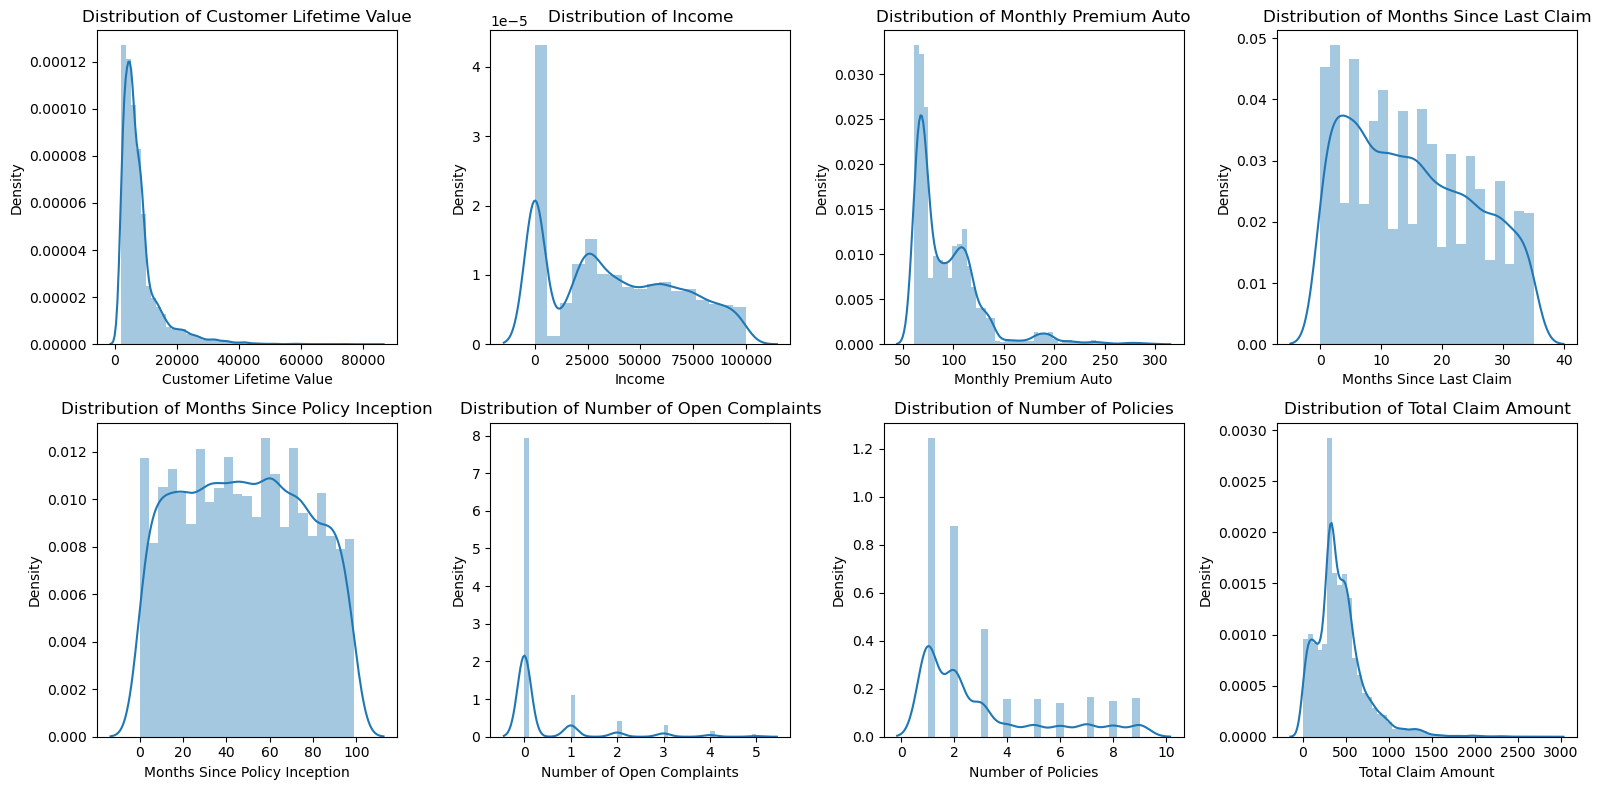

                                       mean        median          min  \
Customer Lifetime Value         8004.940475   5780.182197  1898.007675   
Income                         37657.380009  33889.500000     0.000000   
Monthly Premium Auto              93.219291     83.000000    61.000000   
Months Since Last Claim           15.097000     14.000000     0.000000   
Months Since Policy Inception     48.064594     48.000000     0.000000   
Number of Open Complaints          0.384388      0.000000     0.000000   
Number of Policies                 2.966170      2.000000     1.000000   
Total Claim Amount               434.088794    383.945434     0.099007   

                                        max           std  skewness  
Customer Lifetime Value        83325.381190   6870.967608  3.032280  
Income                         99981.000000  30379.904734  0.286887  
Monthly Premium Auto             298.000000     34.407967  2.123546  
Months Since Last Claim           35.000000     10.07

In [10]:
# set figure size
plt.figure(figsize=(16, 8))

# loop through columns and create distribution plot for each
for i, col in enumerate(num):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()

# calculate summary statistics for each column
summary_stats = pd.DataFrame({'mean': num.mean(),
                              'median': num.median(),
                              'min': num.min(),
                              'max': num.max(),
                              'std': num.std(),
                              'skewness': num.skew()})

# display summary statistics
print(summary_stats)

<div class="alert alert-warning">
    We will examine the <b>skewness</b> to determine which transformation has had the most significant impact in improving it.
</div>


### 3.1 Log Transformation

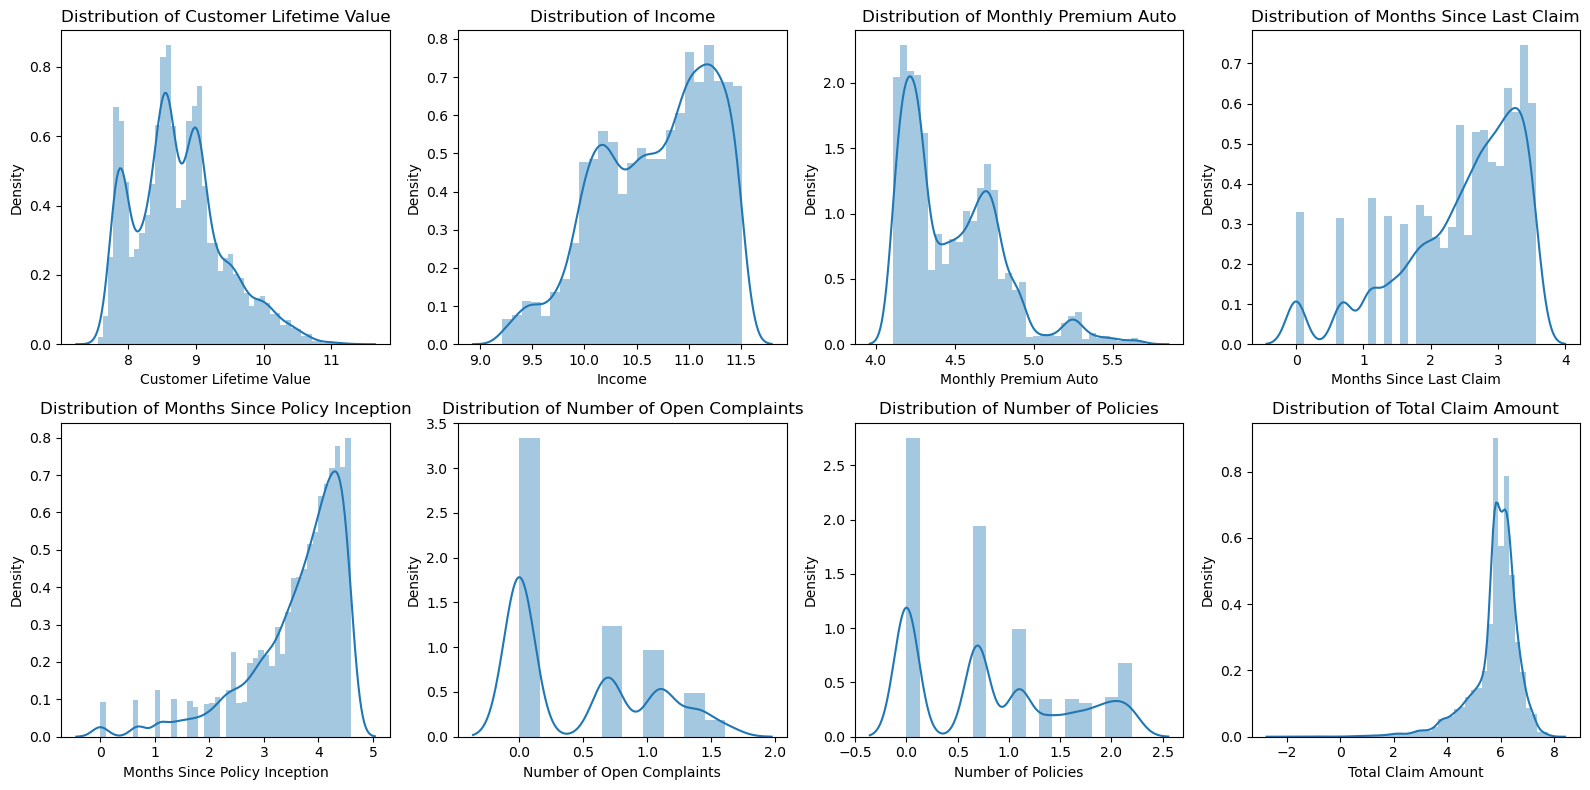

                                    mean     median       min        max  \
Customer Lifetime Value         8.748562   8.662190  7.548560  11.330508   
Income                         10.694229  10.780642  9.214034  11.512735   
Monthly Premium Auto            4.482330   4.418841  4.110874   5.697093   
Months Since Last Claim         2.449229   2.708050  0.000000   3.555348   
Months Since Policy Inception   3.603860   3.871201  0.000000   4.595120   
Number of Open Complaints       0.465844   0.000000  0.000000   1.609438   
Number of Policies              0.801068   0.693147  0.000000   2.197225   
Total Claim Amount              5.790425   5.950500 -2.312565   7.970132   

                                    std  skewness  
Customer Lifetime Value        0.652919  0.575941  
Income                         0.545326 -0.450558  
Monthly Premium Auto           0.308007  1.006154  
Months Since Last Claim        0.899482 -1.005257  
Months Since Policy Inception  0.908826 -1.531295  
Num

In [4]:

# set figure size
plt.figure(figsize=(16, 8))

# Log transformation
numericals_log = num.copy()
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

# apply log transformation to all columns
numericals_log = numericals_log.applymap(log_transform_clean)

# loop through columns and create distribution plot for each
for i, col in enumerate(numericals_log):
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_log[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()



# calculate summary statistics for each column
summary_stats = pd.DataFrame({'mean': numericals_log.mean(),
                              'median': numericals_log.median(),
                              'min': numericals_log.min(),
                              'max': numericals_log.max(),
                              'std': numericals_log.std(),
                              'skewness': numericals_log.skew()})

# display summary statistics
print(summary_stats)

### 3.2 Box-Cox Transformation

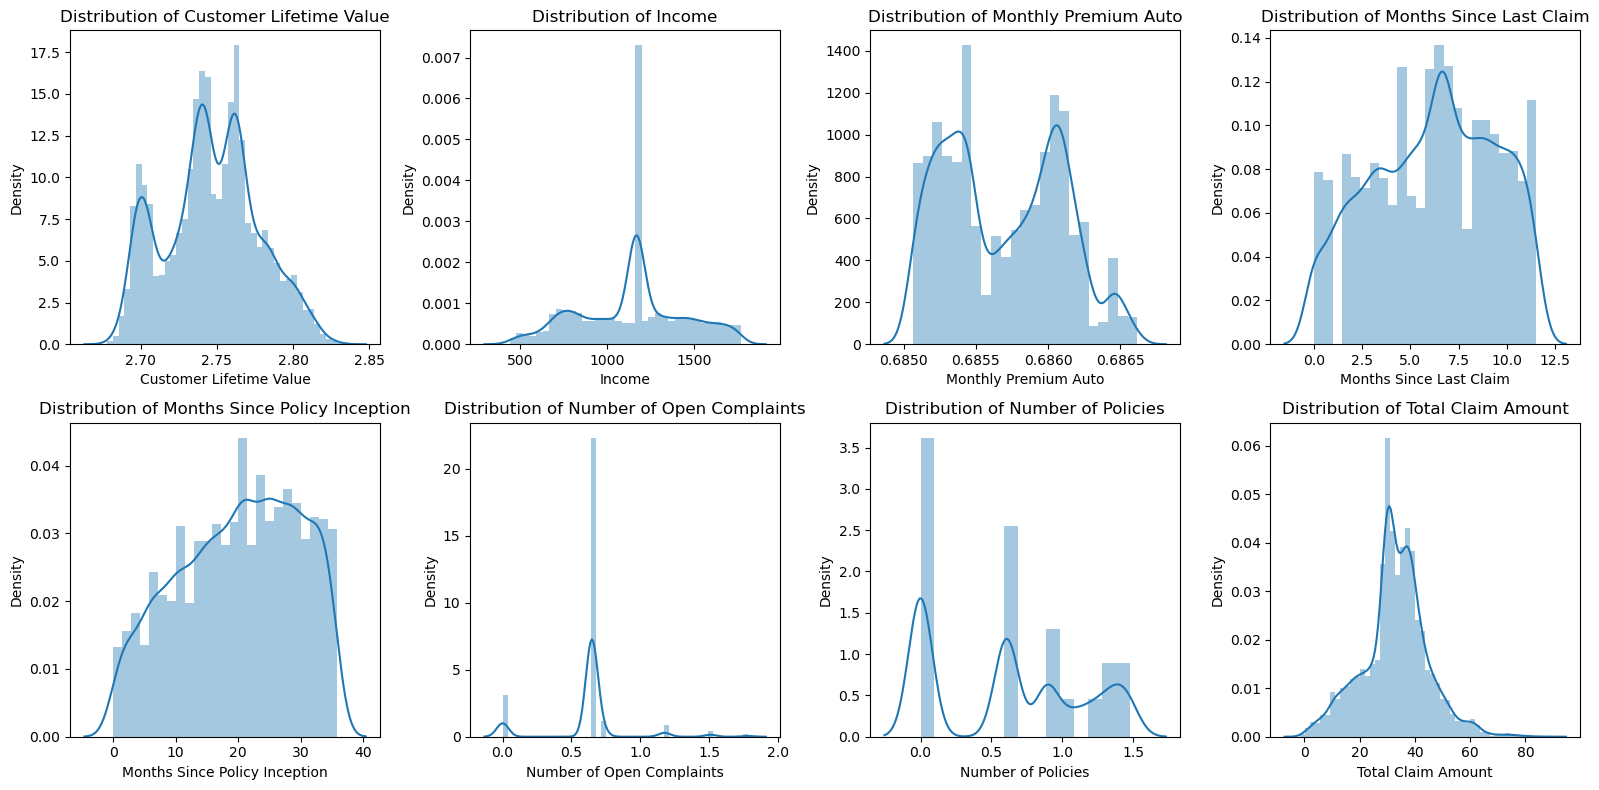

                                      mean       median         min  \
Customer Lifetime Value           2.746599     2.745813    2.677981   
Income                         1142.172039  1167.961077  437.840364   
Monthly Premium Auto              0.685694     0.685688    0.685064   
Months Since Last Claim           6.168405     6.450280    0.000000   
Months Since Policy Inception    20.054768    20.964766    0.000000   
Number of Open Complaints         0.617303     0.648045    0.000000   
Number of Policies                0.612203     0.607328    0.000000   
Total Claim Amount               32.964928    32.998411   -1.407655   

                                       max         std  skewness  
Customer Lifetime Value           2.832791    0.030655  0.043503  
Income                         1768.719456  301.077286 -0.053434  
Monthly Premium Auto              0.686619    0.000407  0.174589  
Months Since Last Claim          11.537192    3.173816 -0.182323  
Months Since Policy Incep

In [5]:
# Box cox transformation
numericals_boxcox = num.copy()

def boxcox_transform(df):
    for col in df:
        df[col] = np.where(df[col] <= 0, np.NAN, df[col]) 
        df[col] = df[col].fillna(df[col].mean())
        transformed_data, _ = stats.boxcox(df[col])
        df[col] = transformed_data
    return df

numericals_boxcox = boxcox_transform(numericals_boxcox)

# set figure size
plt.figure(figsize=(16, 8))

# loop through columns and create distribution plot for each
for i, col in enumerate(numericals_boxcox):
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_boxcox[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()

# calculate summary statistics for Box-Cox transformed data
boxcox_summary_stats = pd.DataFrame({'mean': numericals_boxcox.mean(),
                                     'median': numericals_boxcox.median(),
                                     'min': numericals_boxcox.min(),
                                     'max': numericals_boxcox.max(),
                                     'std': numericals_boxcox.std(),
                                     'skewness': numericals_boxcox.skew()})

print(boxcox_summary_stats)

<div class="alert alert-success">
<b>Box-Cox</b> seems to be better in terms of visualization. So looking at the <b>Skewness</b> values, we can see that Box-Cox values are closer to 0.
</div>

<div class="alert alert-success">
Apart from that, I think that Box-cox would be more interesting as it can deal with negative values.
</div>

### Summary of main paints for both transformations

<b>Box-Cox transformation:</b> 

- Useful for transforming data that has a non-normal distribution, such as skewed or heavy-tailed data.
- Can help stabilize the variance of the data, which is useful for linear regression and other models that assume homoscedasticity.
- Can be applied to data that includes negative values, unlike log-transformation.
- Can be tuned to optimize the transformation parameter, lambda, for the specific distribution of the data.

<b>Log-transformation:</b>

- Useful for transforming data that has a skewed distribution, such as data with a long tail to the right.
- Can help normalize the data and make it more symmetric, which is useful for linear regression and other models - that assume normality.
- Can be applied to data that includes only positive values, unlike Box-Cox transformation.
- Can be interpreted in terms of percent change, which can be useful for some applications.

### <span style="color:green">From this point forward, I will try some extra transformations...</span>


### 3.3 Square Root Transformation

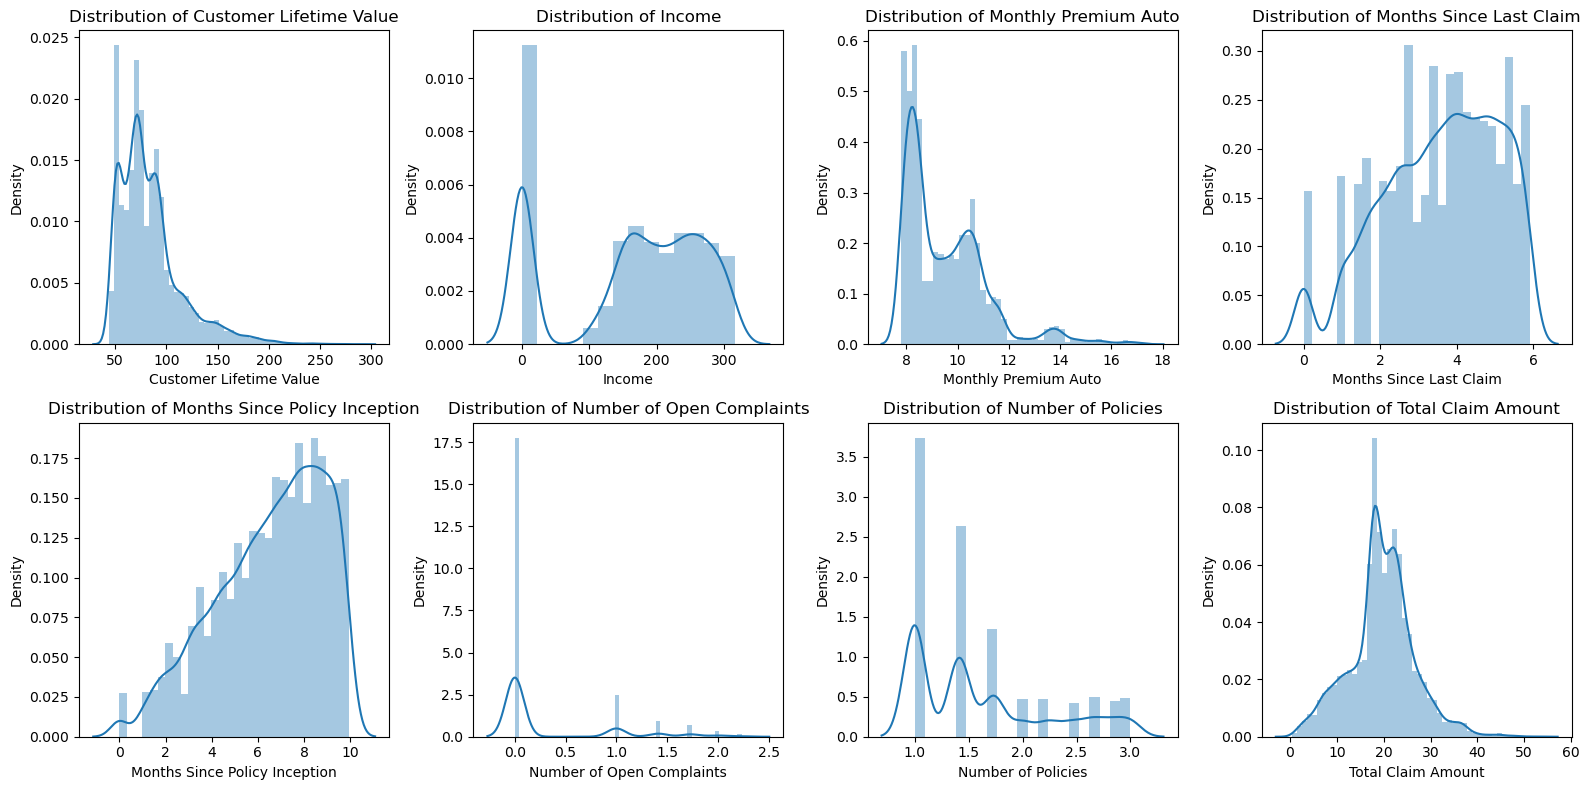

In [6]:
# set figure size
plt.figure(figsize=(16, 8))

numericals_sqrt = num.copy()
for i, col in enumerate(numericals_sqrt):
    numericals_sqrt[col] = np.sqrt(numericals_sqrt[col])
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_sqrt[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()


### 3.4 Min-Max Scaling

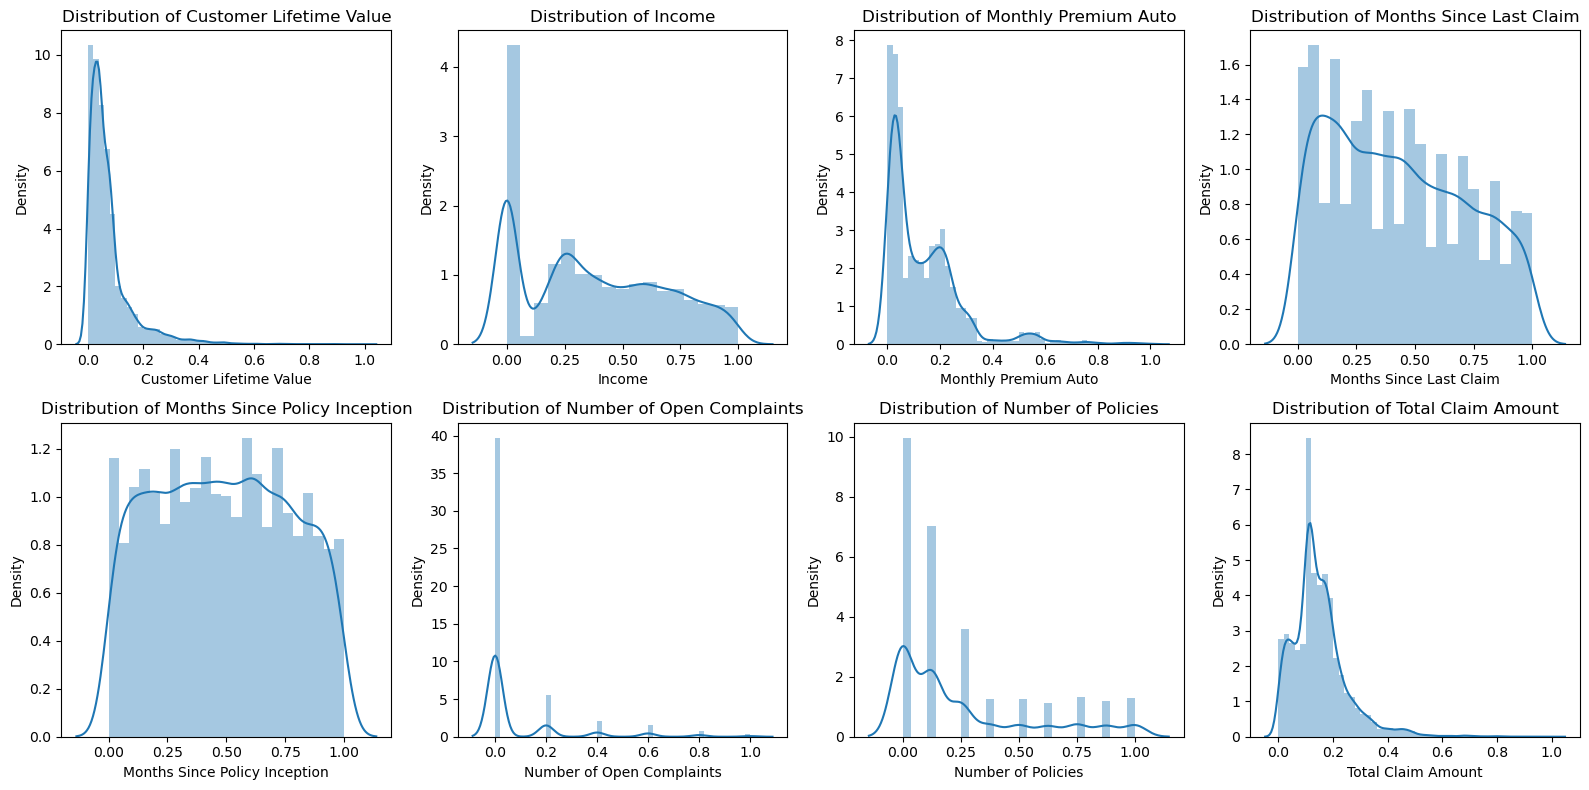

In [7]:
# set figure size
plt.figure(figsize=(16, 8))

numericals_minmax = num.copy()
for i, col in enumerate(numericals_minmax):
    numericals_minmax[col] = (numericals_minmax[col] - numericals_minmax[col].min()) / (numericals_minmax[col].max() - numericals_minmax[col].min())
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_minmax[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()


### 3.5 Z-Score Transformation

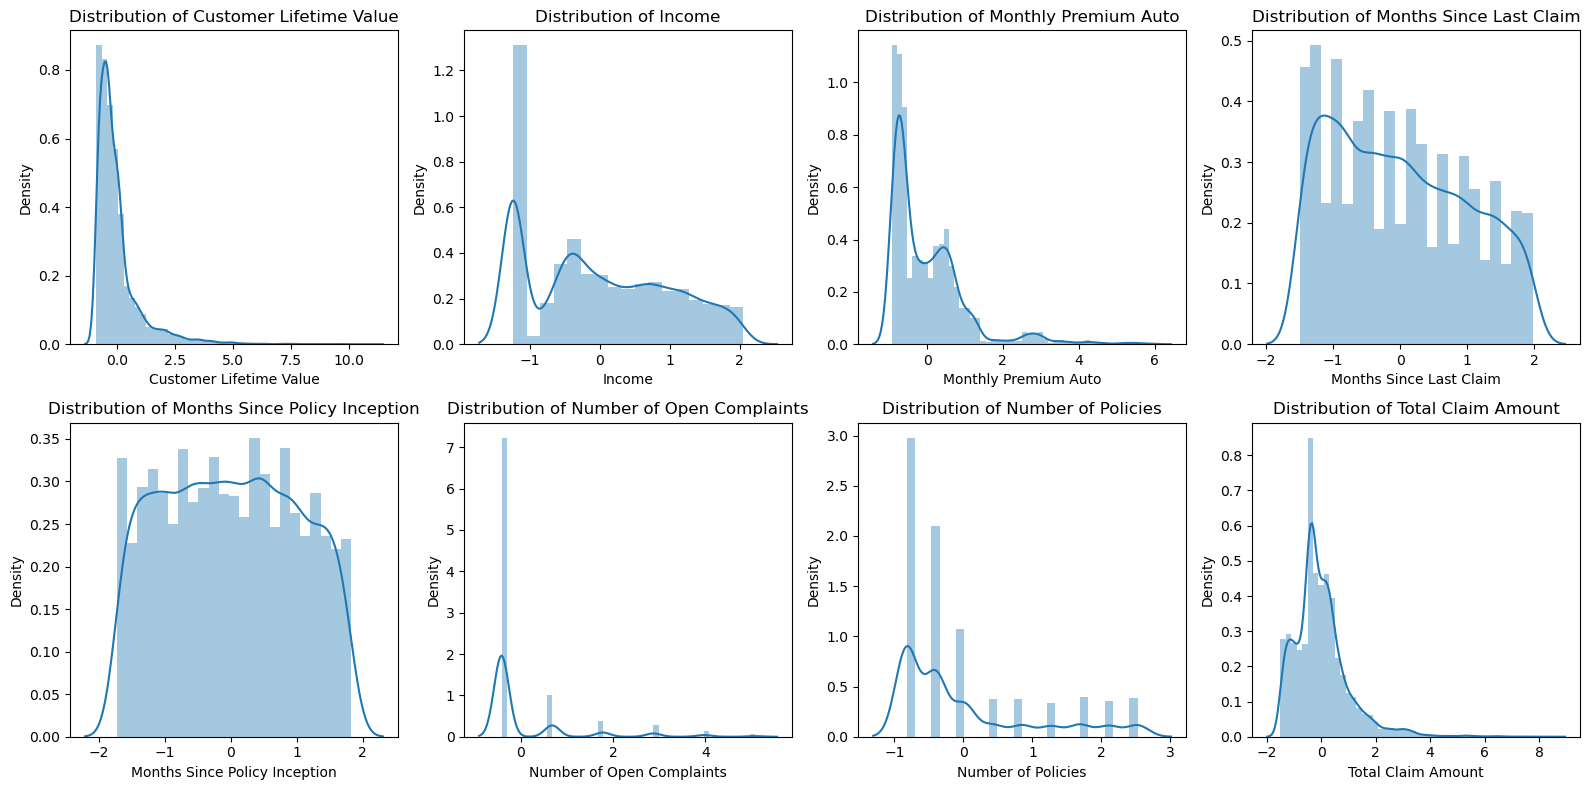

In [8]:
# set figure size
plt.figure(figsize=(16, 8))

# Z-score transformation
numericals_zscore = num.copy()
for i, col in enumerate(numericals_zscore):
    numericals_zscore[col] = (numericals_zscore[col] - numericals_zscore[col].mean()) / numericals_zscore[col].std()
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_zscore[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()


### 3.6 Standard Transformation

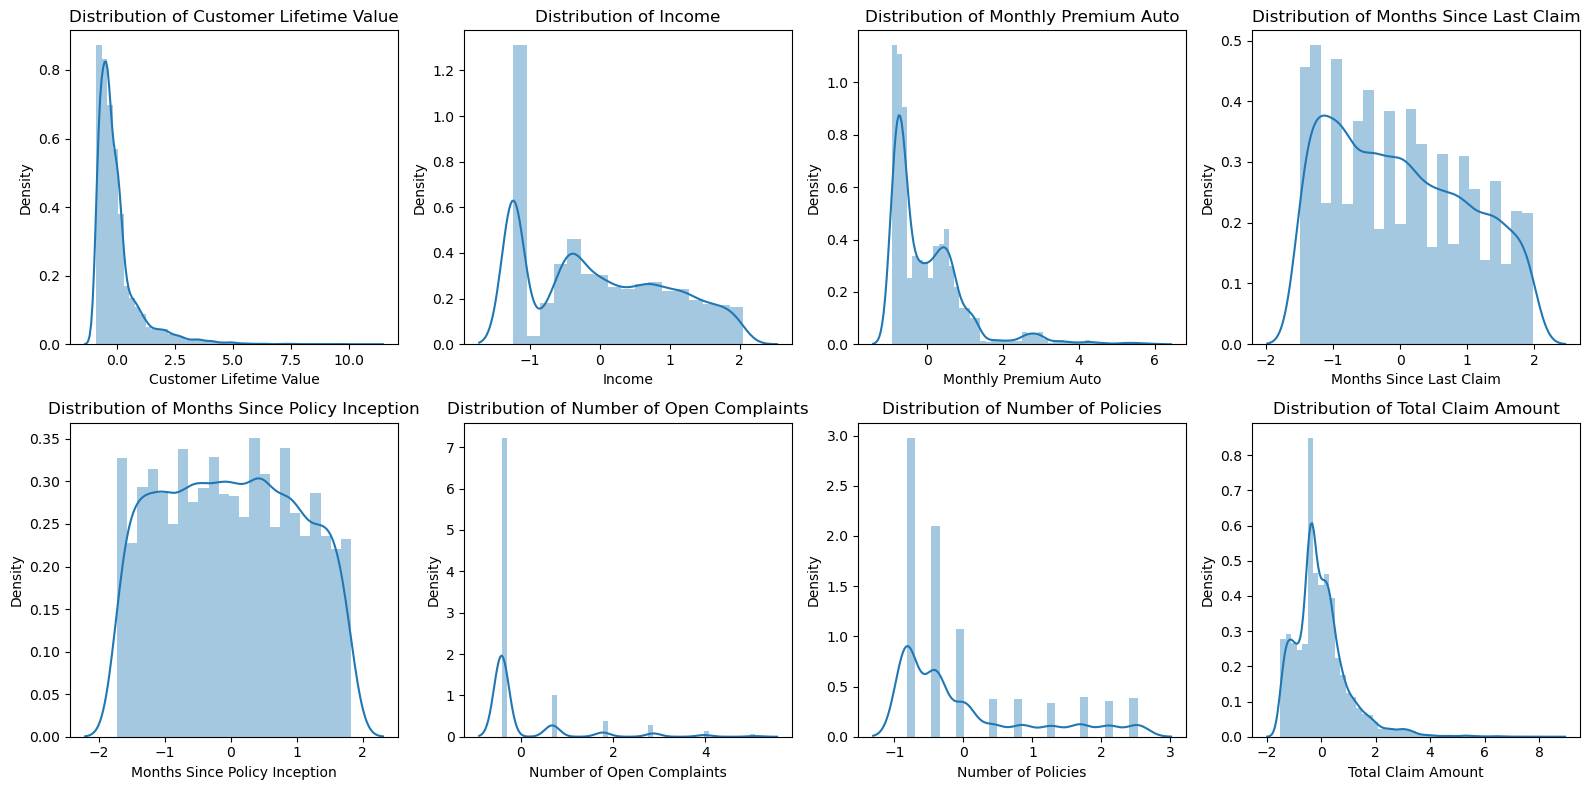

In [9]:
from sklearn.preprocessing import StandardScaler
# set figure size
plt.figure(figsize=(16, 8))
# Standard scaler transformation
numericals_std = num.copy()
scaler = StandardScaler()
numericals_std[num.columns] = scaler.fit_transform(numericals_std[num.columns])

# Plot the transformed data
for i, col in enumerate(numericals_std):
    plt.subplot(2, 4, i+1)
    sns.distplot(numericals_std[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + col)

plt.tight_layout()
plt.show()
